# Pandas

In [ ]:
import pandas as pd

s = pd.Series([10, 20, 30], name="studietimmar")

df_demo = pd.DataFrame({
    "student": ["A", "B", "C"],
    "studietimmar": [10, 5, 8],
    "provpoäng": [85, 70, 78]
})


print(s)
# print(type(s))

print(df_demo)
# print(type(df_demo))

In [ ]:
print(s.values)
print(s.index)

print(df_demo.columns)
print(df_demo.index)
print(df_demo.shape)

In [ ]:
df = pd.read_csv("studietimmar_poang.csv")
# df.head()

print(df.shape)
print(df.columns)
print(df.dtypes)

In [ ]:
df.columns = (df.columns
              .str.strip()
              .str.replace(" ", "_")
              .str.lower())
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df["klass"].value_counts(dropna=False)

In [ ]:
# df["studietimmar"].head()
# df[["studietimmar", "provpoäng"]].head()

# mask = (df["studietimmar"] >= 5)
# mask = (df["studietimmar"] >= 5) & (df["provpoäng"] >= 95)
# mask = (df["studietimmar"] >= 5) | (df["provpoäng"] >= 80)

# Negation: 'inte'  (t.ex. studietimmer saknas eller < 5)
mask = ~(df["studietimmar"] >= 5)


df[mask].head()

In [ ]:
# loc: radetiketter, kolumnnamn
# df.loc[0:3, ["student", "studietimmar"]]

#iloc: radpositioner, kolumnpositioner
df.iloc[0:3, 0:3]

In [ ]:
df.sort_values("provpoäng", ascending=False).head(10)

In [ ]:
df_renamed = df.rename(columns={"provpoäng": "poäng"})
df_renamed.head()

In [ ]:
df = df.assign(poäng_per_timme = df["provpoäng"] / df["studietimmar"])

df.head()

In [ ]:
df_drop = df.drop(columns=["poäng_per_timme"])
df_drop.head()

In [53]:
df.isna().sum()

student            0
studietimmar       4
provpoäng          2
klass              0
poäng_per_timme    6
dtype: int64

In [56]:
df[df["studietimmar"].isna()]

,student,studietimmar,provpoäng,klass,poäng_per_timme
1,Elev 059,NaN,94.0,A,NaN
4,Elev 070,NaN,93.0,B,NaN
75,Elev 074,NaN,70.0,A,NaN
76,Elev 048,NaN,89.0,A,NaN


In [59]:
df_fylld = df.copy()

df_fylld["studietimmar"] = df_fylld["studietimmar"].fillna(0)

df_fylld["studietimmar"].isna().sum()

np.int64(0)

In [66]:
df.isna().sum()

df_clean = df.dropna(subset=["studietimmar", "provpoäng"]).reset_index(drop=True)

df_clean.head()

,student,studietimmar,provpoäng,klass,poäng_per_timme
0,Elev 065,0.7,55.0,B,78.571429
1,Elev 060,8.0,100.0,A,12.500000
2,Elev 005,5.8,100.0,A,17.241379
3,Elev 054,2.2,50.0,B,22.727273
4,Elev 032,0.2,66.0,C,330.000000


In [67]:
len(df), len(df_clean), len(df) - len(df_clean)

(80, 74, 6)

In [71]:
sammanfattning = (
    df.groupby("klass")["provpoäng"]
    .agg(antal = "count", medel = "mean", median = "median", std = "std")
    .reset_index()
)

sammanfattning

,klass,antal,medel,median,std
0,A,25,85.720000,89.0,11.900700
1,B,27,73.148148,70.0,13.863909
2,C,26,71.307692,70.0,9.926809


In [ ]:
df.groupby("klass").agg(
    provpoäng_medel = ("provpoäng", "mean"),
    provpoäng_std = ("provpoäng", "std"),
    studietimmar_median = ("studietimmar", "median")
).reset_index()

# nytt_kolumnnamn = (kolumn, funktion)

,klass,provpoäng_medel,provpoäng_std,studietimmar_median
0,A,85.720000,11.900700,5.8
1,B,73.148148,13.863909,5.0
2,C,71.307692,9.926809,3.7


In [77]:
df["klass"].value_counts(normalize=True).round(2)

klass
B    0.35
C    0.34
A    0.31
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Studietimmar vs Provpoäng')

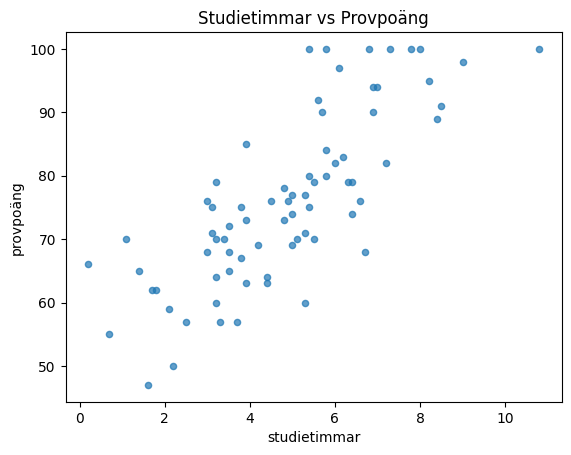

In [81]:
ax = df.plot(kind="scatter", x = "studietimmar", y="provpoäng", alpha=0.7)
ax.set_title("Studietimmar vs Provpoäng")